## Introduction

We will compare ASSURE and Coupled Bootstrap on simulated data.

TODO: Refactor code to make it no p-value threshold. Also pass in c_grid and also change functions so the methods don't do too much: remove plotting plus also NN smoothing plus also true effects

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

import os
import sys
sys.path.append("../")
import methods  
importlib.reload(methods)

<module 'methods' from '/Users/timothysudijono/Projects/statistics/empirical_bayes/CompoundWelfareMaximization/notebooks/../methods.py'>

In [126]:
def compare_methods(true_effects, sigmas, mc_runs = 500):
    """
    Methods: List of Strings of which methods to run
    """
    assure_welfares = np.zeros(mc_runs).astype(float)
    cb_welfares = np.zeros(mc_runs).astype(float)
    dirichlet_welfares = np.zeros(mc_runs).astype(float)

    for j in range(mc_runs):
        Xs = true_effects + np.random.normal(0,sigmas)
        n = len(Xs)
        C_grid = np.linspace(-5, 5, 100)

        ### assure
        assure_curve = methods.heteroskedastic_normal_welfare_estimator(Xs, sigmas, lb = -5, ub = 5);
        threshold = C_grid[np.argmax(assure_curve)]
        assure_welfares[j] = true_effects[Xs >= threshold*sigmas].sum()

        ### CB Welfare
        cb_welfare_curve = methods.coupled_bootstrap(Xs, sigmas,eps = 1./n**0.2, lb = -5, ub = 5)
        threshold = C_grid[np.argmax(cb_welfare_curve)]
        cb_welfares[j] = true_effects[Xs >= threshold*sigmas].sum()

        ### dirichlet
        dirichlet_curve = methods.dirichlet_normal_estimator(Xs, sigmas, lb = -5, ub = 5);
        threshold = C_grid[np.argmax(dirichlet_curve)]
        dirichlet_welfares[j] = true_effects[Xs >= threshold*sigmas].sum()


    return [assure_welfares,  cb_welfares, dirichlet_welfares]



In [127]:
def plot_comparisons(data_gen_function):
    ns = np.logspace(np.log10(50), np.log10(1e5), num=10, dtype=int)

    assure_means = np.zeros(len(ns))
    cb_means = np.zeros(len(ns))
    dirichlet_means = np.zeros(len(ns))

    assure_ses = np.zeros(len(ns))
    cb_ses = np.zeros(len(ns))
    dirichlet_ses = np.zeros(len(ns))

    mc_runs = 500

    for i in range(len(ns)):
        n = int(ns[i])
        print(n)
        Xs, sigmas = data_gen_function(n)

        results = compare_methods(Xs, sigmas, mc_runs=mc_runs)
        # Mean welfare
        assure_means[i] = results[0].mean()
        cb_means[i] = results[1].mean()
        dirichlet_means[i] = results[2].mean()

        # Standard error = std / sqrt(mc_runs)
        assure_ses[i] = results[0].std() / np.sqrt(mc_runs)
        cb_ses[i] = results[1].std() / np.sqrt(mc_runs)
        dirichlet_ses[i] = results[2].std() / np.sqrt(mc_runs)

    log_ns = np.log(ns)

    plt.plot(log_ns, assure_means - dirichlet_means, label="Assure v Dirichlet", color='blue')
    plt.plot(log_ns, assure_means - cb_means, label="ASSURE v. CB", color='green')


    plt.xlabel("log(n)")
    plt.ylabel("Welfare")
    plt.title("Difference between ASSURE and Dirichlet")
    plt.legend()
    plt.grid(True)
    plt.show()

## Case I: Homogeneous Normal with Small Positive Mean

49
116
270
629
1465
3410
7937
18468
42975
100000


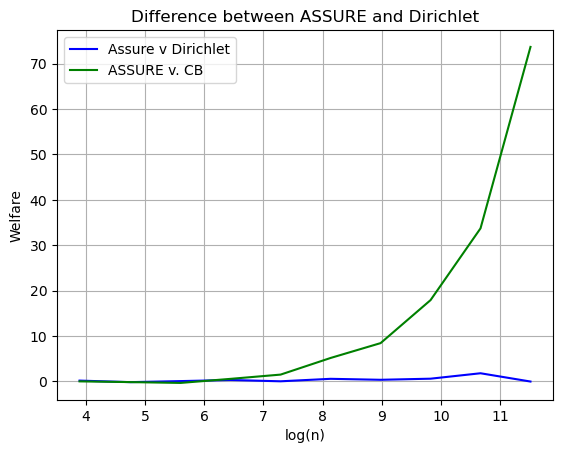

In [110]:
import numpy as np
import matplotlib.pyplot as plt


def homog_normal(n): 
    true_effects = np.random.normal(0.25, 1, n)
    sigmas = np.ones(n)
    return true_effects, sigmas


plot_comparisons(homog_normal)

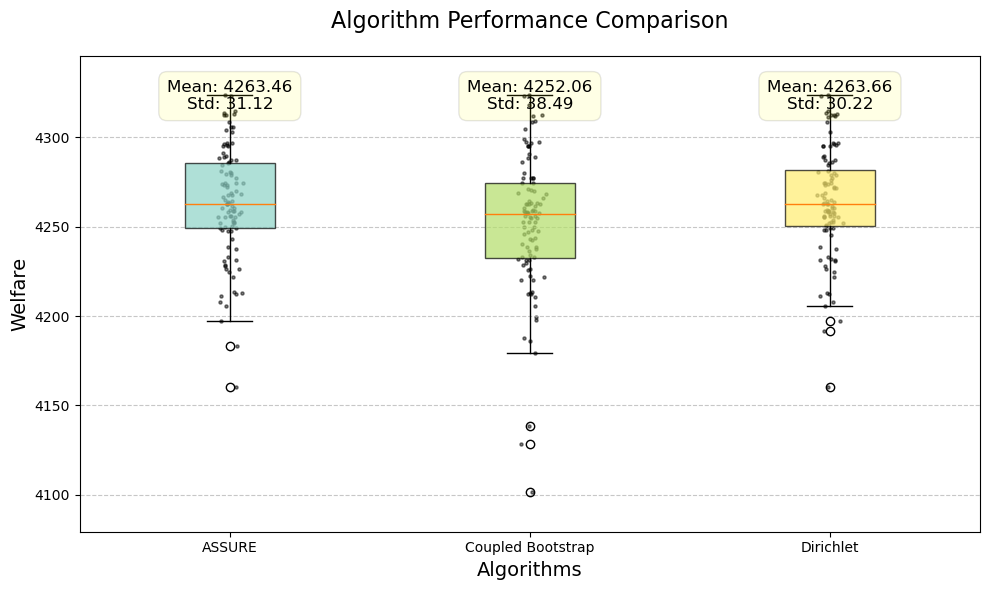

In [111]:
n = 10000
true_effects, sigmas = homog_normal(n)

labels = ["ASSURE", "Coupled Bootstrap", "Dirichlet"]

results = compare_methods(true_effects, sigmas, mc_runs = 100)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

True Optimal Threshold: -0.15151515151515138


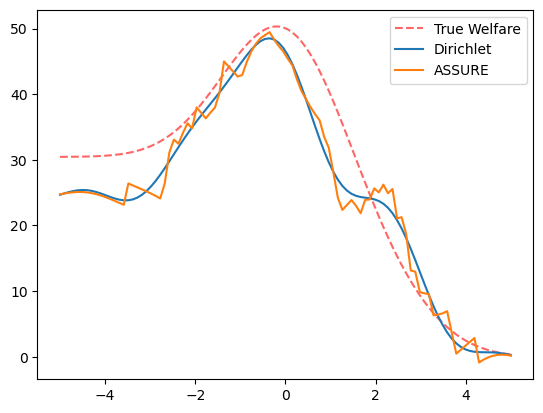

In [112]:
n = 100
true_effects = np.random.normal(0.25, 1, n)
sigmas = np.ones(n)
Xs = true_effects+np.random.normal(0,sigmas)

curve1 = methods.dirichlet_normal_estimator(Xs, sigmas, lb = -5, ub = 5, plot = True, true_effects=true_effects)

curve2 = methods.heteroskedastic_normal_welfare_estimator(Xs, sigmas, lb = -5, ub = 5, plot = False, true_effects=true_effects)

C_grid = np.linspace(-5, 5, 100)
plt.plot(C_grid, curve1, label = "Dirichlet")
plt.plot(C_grid, curve2, label = "ASSURE")
plt.legend()

## Case 1.5: Homogeneous with Small Negative Mean

49
116
270
629
1465
3410
7937
18468
42975
100000


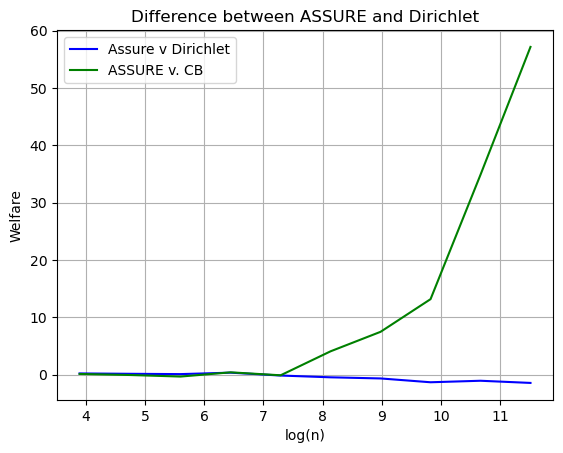

In [113]:

def homog_normal(n): 
    true_effects = np.random.normal(-0.5, 1, n)
    sigmas = np.ones(n)
    return true_effects, sigmas


plot_comparisons(homog_normal)


## Case II: Heterogeneous Normal with Small Positive Mean

49
116
270
629
1465
3410
7937
18468
42975
100000


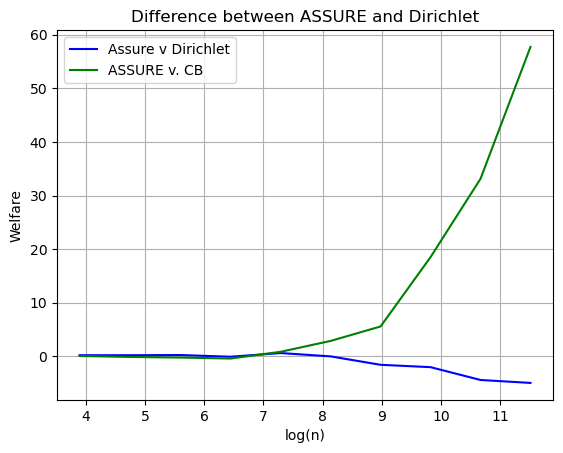

In [114]:
def heterogeneous_variance_normal(n): 
    true_effects = np.random.normal(0.5, 1, n)
    sigmas = np.random.chisquare(5,n)/5
    return true_effects, sigmas

plot_comparisons(heterogeneous_variance_normal)

## Case 2.5: Heterogeneous Normal with Small Positive Mean and Large Variance

49
116
270
629
1465
3410
7937
18468
42975
100000


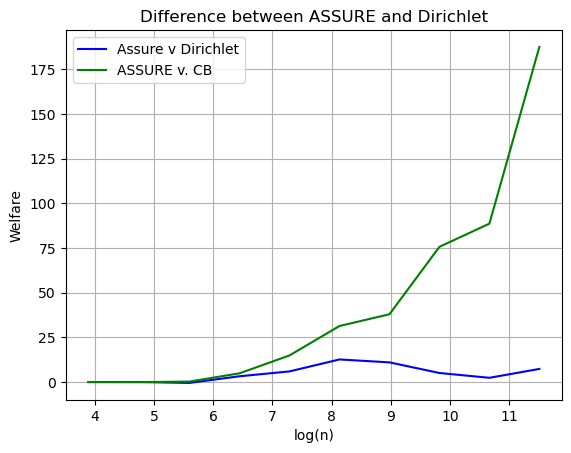

In [128]:
def heterogeneous_variance_normal(n): 
    true_effects = np.random.normal(0.5, 1, n)
    sigmas = np.random.chisquare(5,n)
    return true_effects, sigmas

plot_comparisons(heterogeneous_variance_normal)

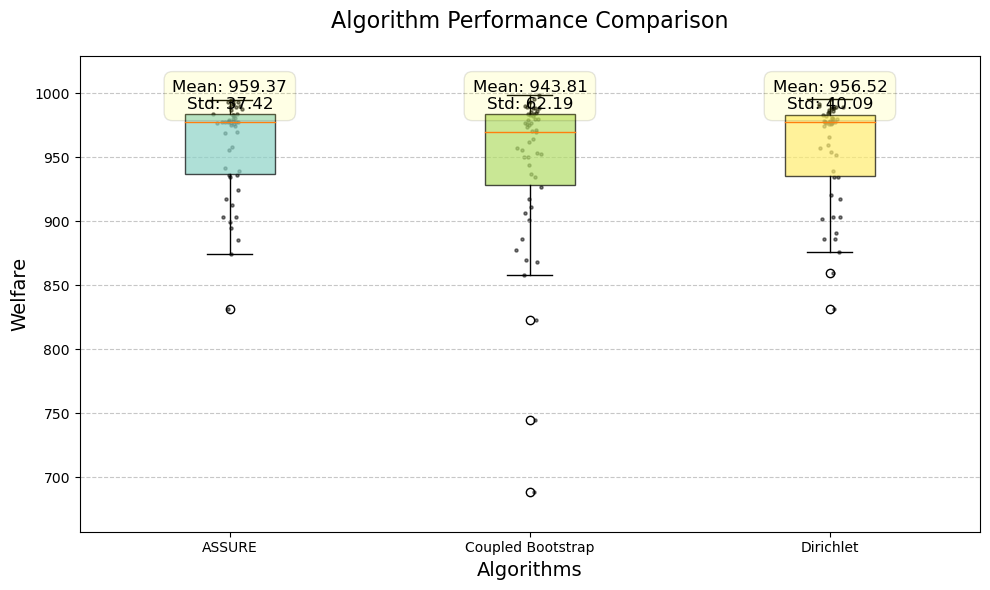

In [129]:
n = 2000
true_effects, sigmas = heterogeneous_variance_normal(n)

labels = ["ASSURE", "Coupled Bootstrap", "Dirichlet"]

results = compare_methods(true_effects, sigmas, mc_runs = 50)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

## Case III: Heterogeneous Normal with Large Positive Mean

49
116
270
629
1465
3410
7937
18468
42975
100000


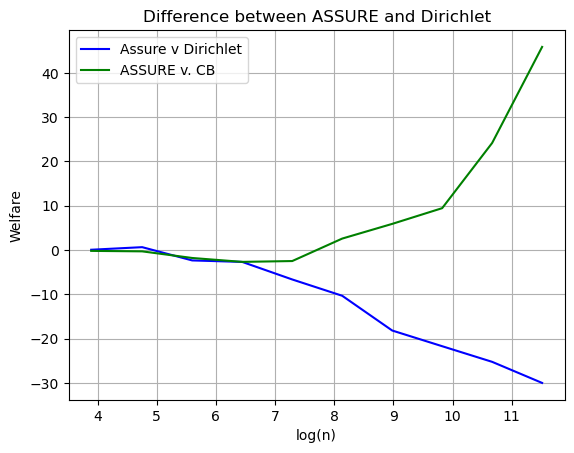

In [117]:
def heterogeneous_variance_normal(n): 
    true_effects = np.random.normal(2, 1, n)
    sigmas = np.random.chisquare(5,n)
    return true_effects, sigmas

plot_comparisons(heterogeneous_variance_normal)

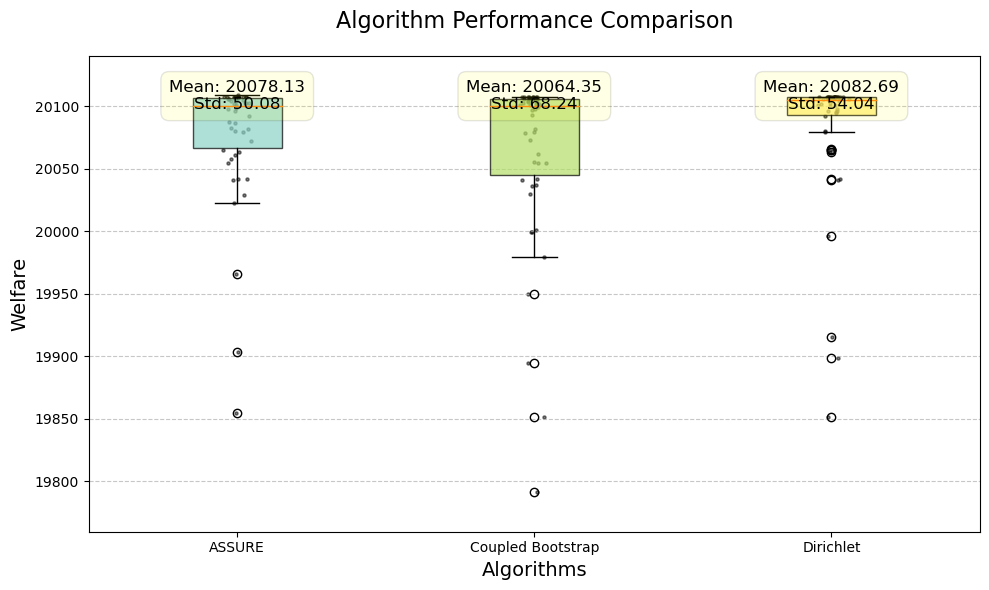

In [118]:
n = 10000
true_effects, sigmas = heterogeneous_variance_normal(n)

labels = ["ASSURE", "Coupled Bootstrap", "Dirichlet"]

results = compare_methods(true_effects, sigmas, mc_runs = 50)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

True Optimal Threshold: -5.0


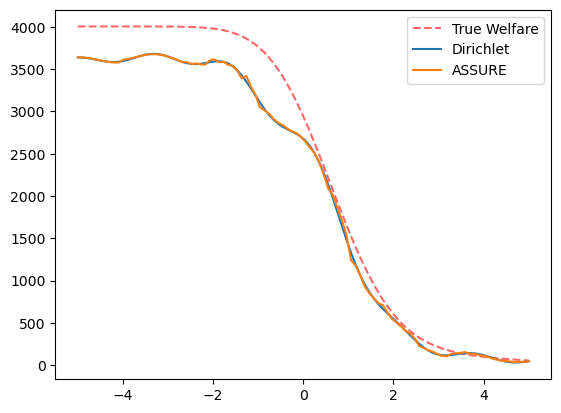

In [119]:
n = 2000
true_effects, sigmas = heterogeneous_variance_normal(n)
Xs = true_effects+np.random.normal(0,sigmas)

curve1 = methods.dirichlet_normal_estimator(Xs, sigmas, lb = -5, ub = 5, plot = True, true_effects=true_effects)

curve2 = methods.heteroskedastic_normal_welfare_estimator(Xs, sigmas, lb = -5, ub = 5, plot = False, true_effects=true_effects)

C_grid = np.linspace(-5, 5, 100)
plt.plot(C_grid, curve1, label = "Dirichlet")
plt.plot(C_grid, curve2, label = "ASSURE")
plt.legend()

## Case IV: All Decisions are Positive; Low Variance

49
116
270
629
1465
3410
7937
18468
42975
100000


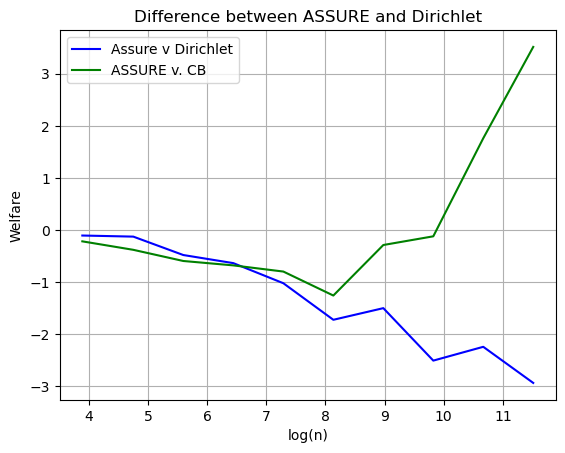

In [120]:
def all_pos(n): 
    true_effects = np.random.normal(2,0.5,n)
    sigmas = np.random.chisquare(5,n)/5
    return true_effects, sigmas

plot_comparisons(all_pos)

## Case 4.5: All Decisions positive, with Larger Variances

49
116
270
629
1465
3410
7937
18468
42975
100000


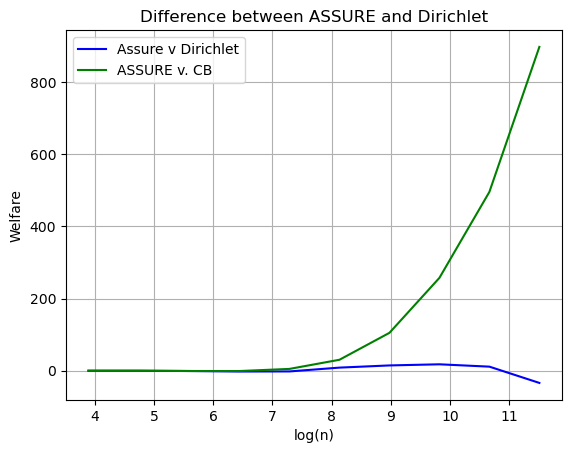

In [121]:
def all_pos(n): 
    true_effects = np.random.normal(0.2,0.01,n)
    sigmas = np.random.chisquare(10,n)
    return true_effects, sigmas

plot_comparisons(all_pos)


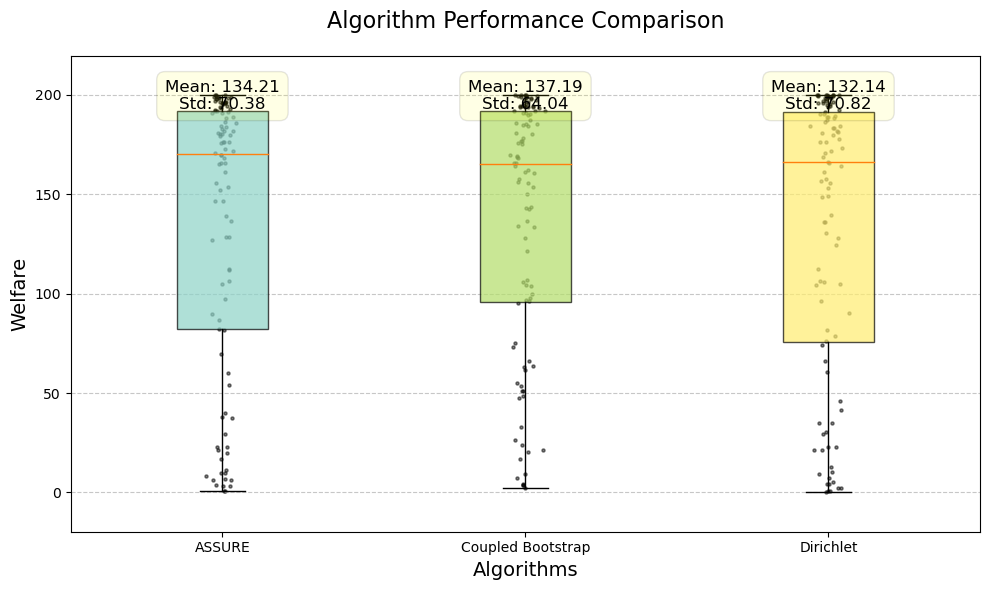

In [122]:
n = 1000
true_effects, sigmas = all_pos(n)

labels = ["ASSURE", "Coupled Bootstrap", "Dirichlet"]

results = compare_methods(true_effects, sigmas, mc_runs = 100)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

True Optimal Threshold: -5.0


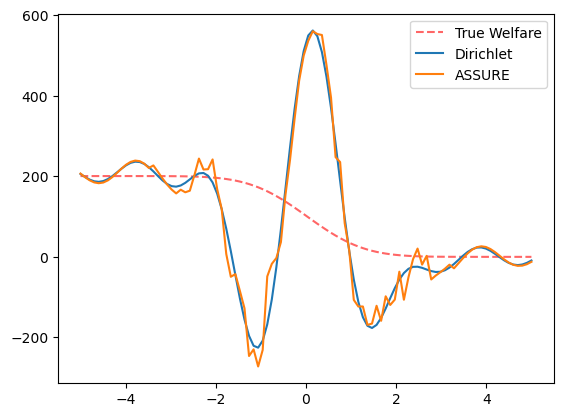

In [123]:
n = 1000
true_effects, sigmas = all_pos(n)
Xs = true_effects+np.random.normal(0,sigmas)

curve1 = methods.dirichlet_normal_estimator(Xs, sigmas, lb = -5, ub = 5, plot = True, true_effects=true_effects)

curve2 = methods.heteroskedastic_normal_welfare_estimator(Xs, sigmas, lb = -5, ub = 5, plot = False, true_effects=true_effects)

C_grid = np.linspace(-5, 5, 100)
plt.plot(C_grid, curve1, label = "Dirichlet")
plt.plot(C_grid, curve2, label = "ASSURE")
plt.legend()

## Case V: Mixture

49
116
270
629
1465
3410
7937
18468
42975
100000


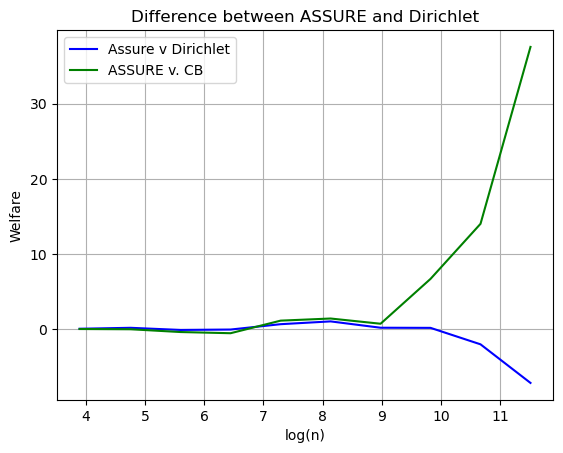

In [124]:
def mixture(n): 
    true_effects = np.concatenate((np.random.normal(-0.2, 0.1, int(n/2)), np.random.normal(0,0.5,n - int(n/2))))
    sigmas = np.random.chisquare(5,n)/5
    return true_effects, sigmas

plot_comparisons(mixture)